In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [40]:
tf.__version__

'2.2.0'

In [44]:
#import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models, utils, Sequential, preprocessing

In [28]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [29]:
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

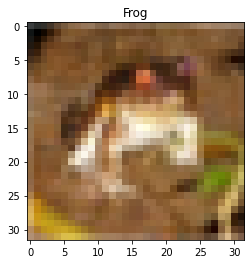

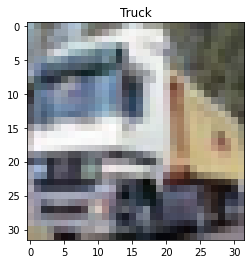

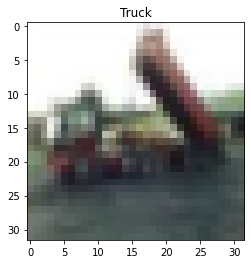

In [30]:
for i in range(3):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i][0]
    # Look up the class name from the class id
    image_class_name = cifar10_class_names[image_class_number]

    # Draw the image as a plot
    plt.imshow(sample_image)
    # Label the image
    plt.title(image_class_name)
    # Show the plot on the screen
    plt.show()

In [10]:
x_train =x_train.astype("float32")
x_test =x_test.astype("float32")
x_train =x_train/255
x_test =x_test/255
y_train =utils.to_categorical(y_train,10)
y_test =utils.to_categorical(y_test,10)


In [11]:
# Create a model and add layers
model =Sequential()

# adding convolutional layers
model.add(layers.Conv2D(32,(3,3),padding="same",activation="relu",input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32,(3,3), activation="relu"))

# adding max pool after set of convolution layers
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Dropout for reducing overfitting
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(64, (3,3),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.25))

#add flatten layer
model.add(layers.Flatten())

#Dense layer for actual neural network classification
model.add(layers.Dense(512,activation="relu",input_shape=(32,32,3)))


model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [12]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [15]:
# Train the model
num_epoch=30
batch_size=32
suffle_data=True
history=model.fit(x_train, y_train, batch_size=batch_size,epochs=num_epoch,validation_data=(x_test, y_test), shuffle=suffle_data)

Epoch 1/30
1563/1563 [==============================] - 102s 65ms/step - loss: 1.3062 - accuracy: 0.5281 - val_loss: 1.0838 - val_accuracy: 0.6160
Epoch 2/30
1563/1563 [==============================] - 106s 68ms/step - loss: 1.0250 - accuracy: 0.6357 - val_loss: 0.9055 - val_accuracy: 0.6776
Epoch 3/30
1563/1563 [==============================] - 109s 70ms/step - loss: 0.8843 - accuracy: 0.6877 - val_loss: 0.8291 - val_accuracy: 0.7066
Epoch 4/30
1563/1563 [==============================] - 121s 77ms/step - loss: 0.7893 - accuracy: 0.7228 - val_loss: 0.7728 - val_accuracy: 0.7320
Epoch 5/30
1563/1563 [==============================] - 129s 82ms/step - loss: 0.7261 - accuracy: 0.7460 - val_loss: 0.7786 - val_accuracy: 0.7345
Epoch 6/30
1563/1563 [==============================] - 125s 80ms/step - loss: 0.6739 - accuracy: 0.7641 - val_loss: 0.7137 - val_accuracy: 0.7555
Epoch 7/30
1563/1563 [==============================] - 133s 85ms/step - loss: 0.6316 - accuracy: 0.7767 - val_loss: 0

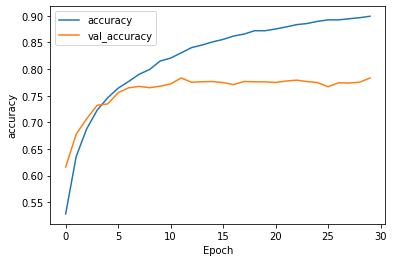

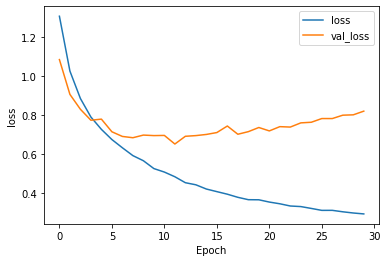

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epoch")
  plt.ylabel(string)
  plt.legend([string, "val_"+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history,"loss")

In [18]:
from pathlib import Path
# Save neural network structure
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

4255

In [20]:
model.save('./mode_save/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./mode_save/assets


In [47]:
import numpy as np

In [22]:
modelLoaded = models.load_model('./mode_save/')

In [54]:
# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img = preprocessing.image.load_img("./Test/car.png", target_size=(32, 32))

# Convert the image to a numpy array
image_to_test = preprocessing.image.img_to_array(img)

# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

# Make a prediction using the model
results = modelLoaded.predict(list_of_images)
results

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [55]:
# Since we are only testing one image, we only need to check the first result
single_result = results[0]

# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

# Get the name of the most likely class
class_label = cifar10_class_names[most_likely_class_index]

# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Truck - Likelihood: 1.000000


# Working with Pretrained Models

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing import image
import numpy as np

In [14]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model = vgg16.VGG16()

# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("./Test/bay.jpg", target_size=(224, 224))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a fourth dimension (since Keras expects a list of images)
x = np.expand_dims(x, axis=0)

# Normalize the input image's pixel values to the range used when training the neural network
x =vgg16.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions =model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes =vgg16.decode_predictions(predictions, top=9)

print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print("Prediction: {} - {:2f}".format(name, likelihood))




40960/35363 [==================================] - 0s 0us/step
Top predictions for this image:
Prediction: seashore - 0.395213
Prediction: promontory - 0.326129
Prediction: lakeside - 0.119613
Prediction: breakwater - 0.062801
Prediction: sandbar - 0.045267
Prediction: cliff - 0.011845
Prediction: dock - 0.009196
Prediction: boathouse - 0.003278
Prediction: valley - 0.003194


# Transfer Learning: Feature Extraction

In [19]:
import tensorflow as tf
from pathlib import Path
import numpy as np
import joblib
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import vgg16

In [20]:
# Path to folders with training data
dog_path = Path("training_data") / "dogs"
not_dog_path = Path("training_data") / "not_dogs"

images = []
labels = []

# Load all the not-dog images
for img in not_dog_path.glob("*.png"):
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'not dog' image, the expected value should be 0
    labels.append(0)

# Load all the dog images
for img in dog_path.glob("*.png"):
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'dog' image, the expected value should be 1
    labels.append(1)

# Create a single numpy array with all the images we loaded
x_train =np.array(images)

# Also convert the labels to a numpy array
y_train =np.array(labels)

# Normalize image data to 0-to-1 range
x_train = vgg16.preprocess_input(x_train)

# Load a pre-trained neural network to use as a feature extractor
pretrained_nn =vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))


# Extract features for each image (all in one pass)
features_x =pretrained_nn.predict(x_train)

# Save the array of extracted features to a file
joblib.dump(features_x, "x_train.dat")

# Save the matching array of expected values to a file
joblib.dump(y_train, "y_train.dat")



58892288/58889256 [==============================] - 41s 1us/step


['y_train.dat']

# Transfer Learning: Used Extracted Features

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [22]:
# Load data
x_train=joblib.load("x_train.dat")
y_train=joblib.load( "y_train.dat")

In [29]:
# Create a model and add layers
model=Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



In [30]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [32]:
num_epochs=20
history=model.fit(x_train, y_train, epochs=num_epochs,shuffle=True)

Epoch 1/20
2/2 [==============================] - 0s 2ms/step - loss: 14.7508 - accuracy: 0.5345
Epoch 2/20
2/2 [==============================] - 0s 2ms/step - loss: 1.5322 - accuracy: 0.8103
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.9655
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 1.7604e-05 - accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9828
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9828
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9828
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 7.4548e-13 - accuracy: 1.0000
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 3.8042e-19 - accuracy: 1.0000
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 2.5577e-18 - accuracy: 1.0000
Epoch 11/20
2/2 [=====

In [35]:
# Save neural network structure
model_structure = model.to_json()
f = Path("./saved_model/model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("./saved_model/model_weights.h5")

# Transfer Learning: Making Prediction

In [38]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image

In [45]:
# Load the json file that contains the model's structure
f = Path("./saved_model/model_structure.json")
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("./saved_model/model_weights.h5")

# Load an image file to test, resizing it to 64x64 pixels (as required by this model)
img = image.load_img("./Test/not_dog.png", target_size=(64, 64))

# Convert the image to a numpy array
image_array = image.img_to_array(img)

# Add a forth dimension to the image (since Keras expects a bunch of images, not a single image)
images = np.expand_dims(image_array, axis=0)

# Normalize the data
images = vgg16.preprocess_input(images)

# Use the pre-trained neural network to extract features from our test image (the same way we did to train the model)
feature_extraction_model = vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
features =feature_extraction_model.predict(images)

# Given the extracted features, make a final prediction using our own model
results =model.predict(features)

# Since we are only testing one image with possible class, we only need to check the first result's first element
single_result = results[0][0]

# Print the result
print("Likelihood that this image contains a dog: {}%".format(int(single_result * 100)))

Likelihood that this image contains a dog: 0%
